In [1]:
import torch
import torchvision
import warnings
import os

from torch import nn
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore",category=UserWarning)

print("Version de Pytorch: ",torch.__version__)
print("Version de Torchvision: ",torchvision.__version__)

Version de Pytorch:  2.1.2
Version de Torchvision:  0.16.2


In [3]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = false
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    model_ft = None
    input_size = 0
    if model_name == "DenseNet":
        """Densenet
        """
        model_ft = models.densenet121(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes)
        input_size = 224
    else:
        print("Nombre del modelo invalido, salir...")
        exit()
    return model_ft, input_size

model_ft, input_size = initialize_model("DenseNet", 52, False, use_pretrained=True)
device = torch.device("cuda:0"if torch.cuda.is_available() else "cpu")
model_ft.eval()
model_ft.to(device)
model_ft.load_state_dict(torch.load('D:/Lenguaje de señas/best.pt')['model_state_dict'])

data_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.CenterCrop(input_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])
data_dir = 'D:/Lenguaje de señas/dataset/val'
test_dataset = datasets.ImageFolder(os.path.join(data_dir), transform=data_transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

device = torch.device("cuda:0"if torch.cuda.is_available() else "cpu")
model_ft.to(device)
model_ft.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

conf_matrix = confusion_matrix(y_true, y_pred)

print("Matriz de confusion: ")
print(conf_matrix)

Matriz de confusion: 
[[27  0  5 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 32  0]
 [ 0  0  0 ...  0  0 32]]


In [4]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

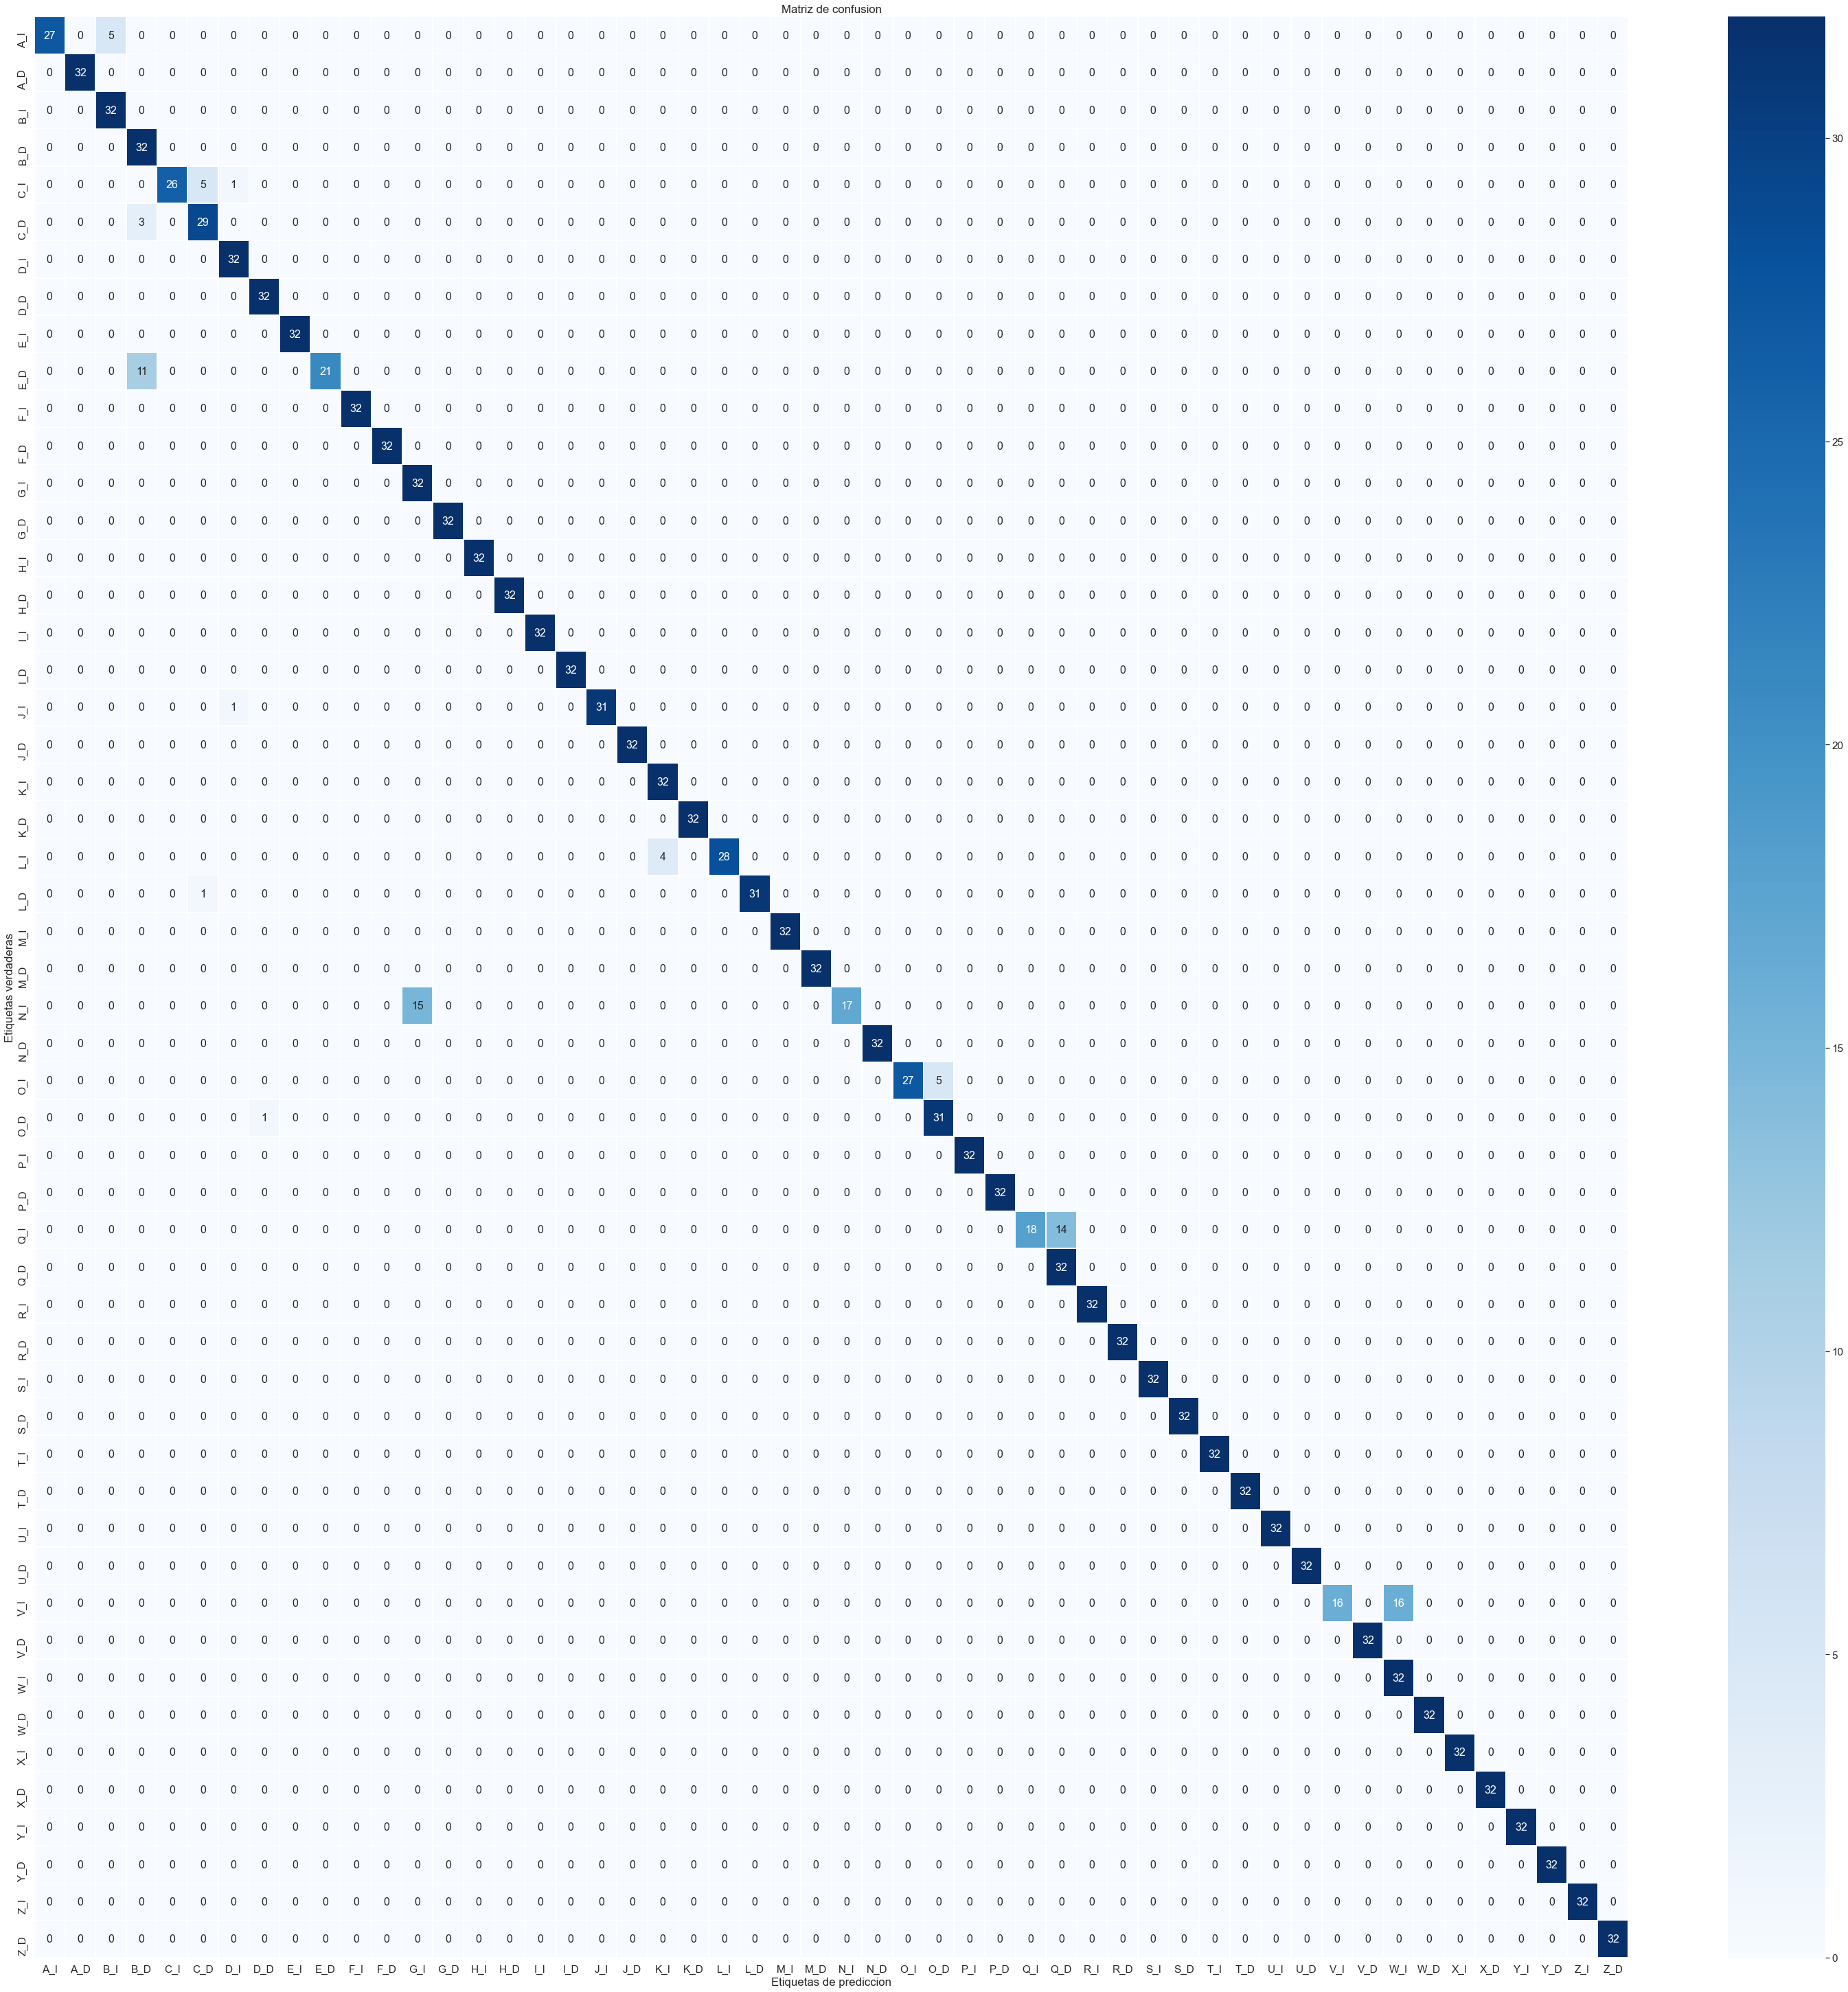

In [8]:
df_cm = pd.DataFrame(conf_matrix, range(52), range(52))
fig = plt.figure(figsize=(52,52))
sn.set(font_scale=1.4)

sn.heatmap(df_cm, annot=True, linewidths=0.5, linecolor="w", annot_kws={"size": 16},xticklabels=["A_I","A_D", "B_I", "B_D", "C_I", "C_D", "D_I", "D_D", "E_I", "E_D", "F_I", "F_D", "G_I", "G_D", "H_I", "H_D", "I_I", "I_D", "J_I", "J_D", "K_I", "K_D", "L_I", "L_D", "M_I", "M_D", "N_I", "N_D", "O_I", "O_D", "P_I", "P_D", "Q_I", "Q_D", "R_I", "R_D", "S_I", "S_D", "T_I", "T_D", "U_I", "U_D", "V_I", "V_D", "W_I", "W_D", "X_I", "X_D", "Y_I", "Y_D", "Z_I", "Z_D"], yticklabels=["A_I","A_D", "B_I", "B_D", "C_I", "C_D", "D_I", "D_D", "E_I", "E_D", "F_I", "F_D", "G_I", "G_D", "H_I", "H_D", "I_I", "I_D", "J_I", "J_D", "K_I", "K_D", "L_I", "L_D", "M_I", "M_D", "N_I", "N_D", "O_I", "O_D", "P_I", "P_D", "Q_I", "Q_D", "R_I", "R_D", "S_I", "S_D", "T_I", "T_D", "U_I", "U_D", "V_I", "V_D", "W_I", "W_D", "X_I", "X_D", "Y_I", "Y_D", "Z_I", "Z_D"], cmap='Blues')

plt.xlabel('Etiquetas de prediccion')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusion')
fig.savefig(f'D:/Confusion_matrix.png')
plt.show()

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
Accuracy = accuracy_score(y_true, y_pred)
print(Accuracy)

0.9507211538461539


In [11]:
from sklearn.metrics import classification_report

In [12]:
target_names = ["A_I","A_D", "B_I", "B_D", "C_I", "C_D", "D_I", "D_D", "E_I", "E_D", "F_I", "F_D", "G_I", "G_D", "H_I", "H_D", "I_I", "I_D", "J_I", "J_D", "K_I", "K_D", "L_I", "L_D", "M_I", "M_D", "N_I", "N_D", "O_I", "O_D", "P_I", "P_D", "Q_I", "Q_D", "R_I", "R_D", "S_I", "S_D", "T_I", "T_D", "U_I", "U_D", "V_I", "V_D", "W_I", "W_D", "X_I", "X_D", "Y_I", "Y_D", "Z_I", "Z_D"]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         A_I       1.00      0.84      0.92        32
         A_D       1.00      1.00      1.00        32
         B_I       0.86      1.00      0.93        32
         B_D       0.70      1.00      0.82        32
         C_I       1.00      0.81      0.90        32
         C_D       0.83      0.91      0.87        32
         D_I       0.94      1.00      0.97        32
         D_D       0.97      1.00      0.98        32
         E_I       1.00      1.00      1.00        32
         E_D       1.00      0.66      0.79        32
         F_I       1.00      1.00      1.00        32
         F_D       1.00      1.00      1.00        32
         G_I       0.68      1.00      0.81        32
         G_D       1.00      1.00      1.00        32
         H_I       1.00      1.00      1.00        32
         H_D       1.00      1.00      1.00        32
         I_I       1.00      1.00      1.00        32
         I_D       1.00    